In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import numpy as np

In [15]:
dataset = pd.read_excel("Superstore_USA1.xlsx")

In [16]:
dataset.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


In [18]:
dataset.shape

(9426, 24)

In [21]:
dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [20]:
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(), inplace = True)

In [28]:
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

In [29]:
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

In [27]:
dataset['Order Priority'] = dataset['Order Priority'].replace("Critical ", "Critical")

# Order Priority

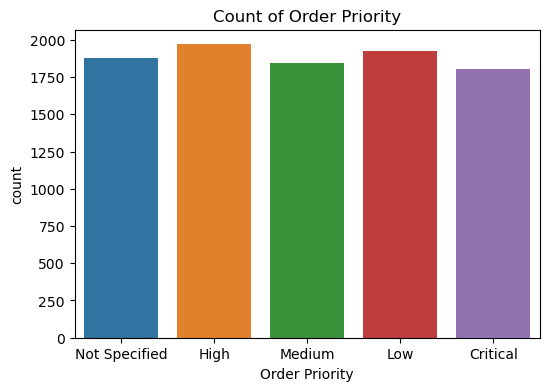

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(x="Order Priority", data = dataset) 
plt.title("Count of Order Priority")
plt.savefig("Count of Order Priority.jpg")
plt.show()

# Ship Mode

In [38]:
dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [42]:
ship_mode_x = dataset['Ship Mode'].value_counts().index
ship_mode_y = dataset['Ship Mode'].value_counts().values

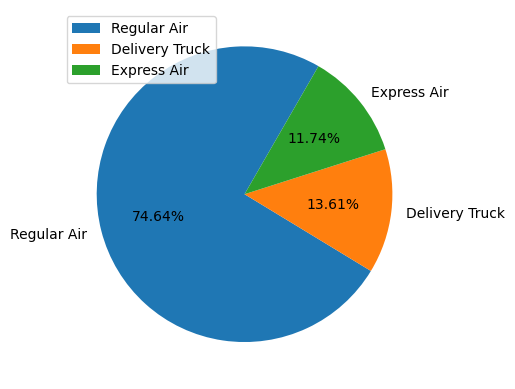

In [47]:
plt.pie(ship_mode_y, labels = ship_mode_x, startangle = 60, autopct = "%0.2f%%")
plt.legend(loc=2)
plt.savefig("Count of ship mode.jpg")
plt.show()

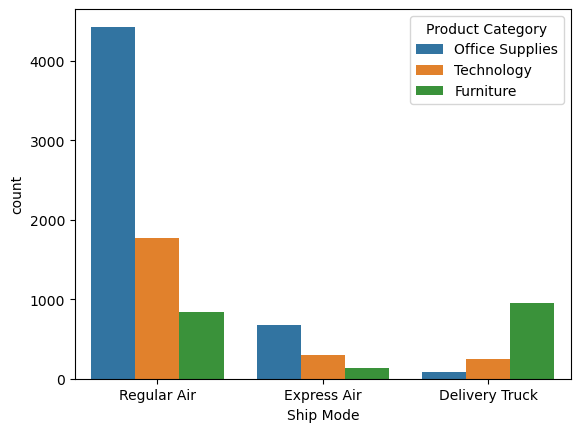

In [50]:
sns.countplot(x="Ship Mode", data=dataset, hue = "Product Category")
plt.savefig("Prdouct Category and ship mode relation.jpg")

# Customer Segment

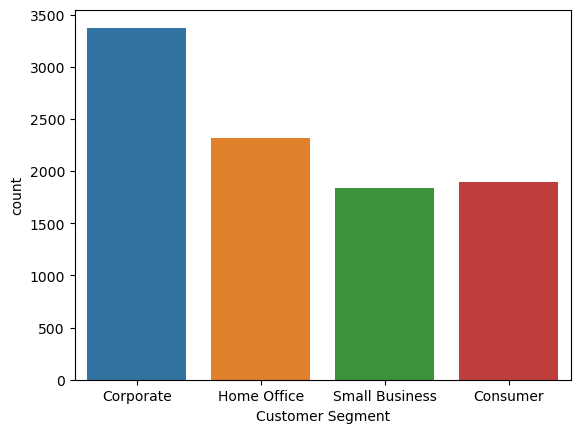

In [52]:
sns.countplot(x="Customer Segment", data=dataset)
plt.savefig("Customer Segment info.jpg")

# Product Category

<Axes: xlabel='Product Category', ylabel='count'>

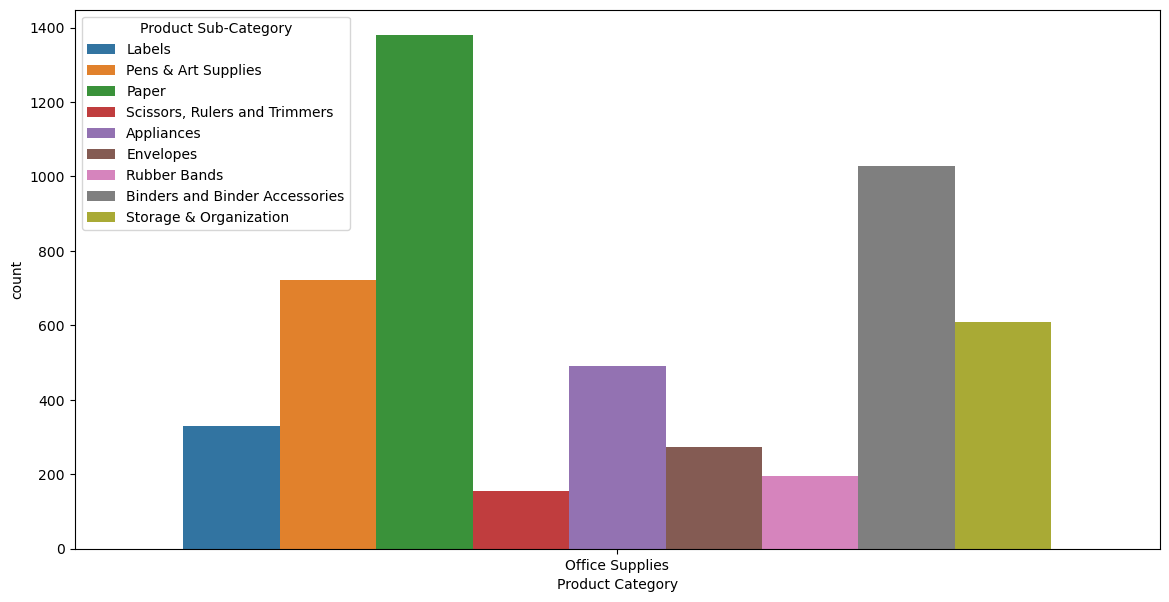

In [58]:
plt.figure(figsize=(14,7))
sns.countplot(x="Product Category", data=dataset[dataset["Product Category"] == "Office Supplies"], hue="Product Sub-Category")


In [60]:
dataset["Order year"] = dataset["Order Date"].dt.year

In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [63]:
dataset["Order year"].value_counts()

Order year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

<Axes: xlabel='Order year', ylabel='count'>

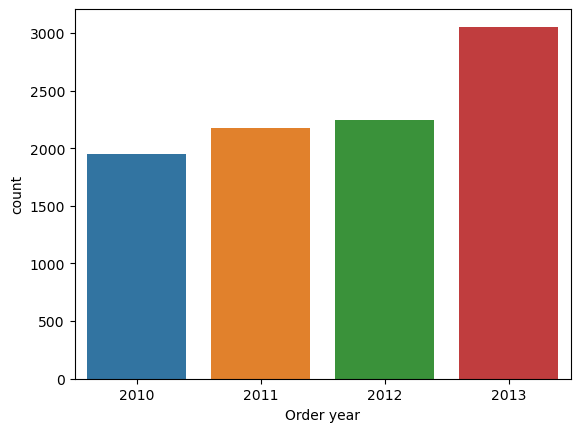

In [64]:
sns.countplot(x="Order year", data=dataset)

<Axes: xlabel='Product Category', ylabel='Profit'>

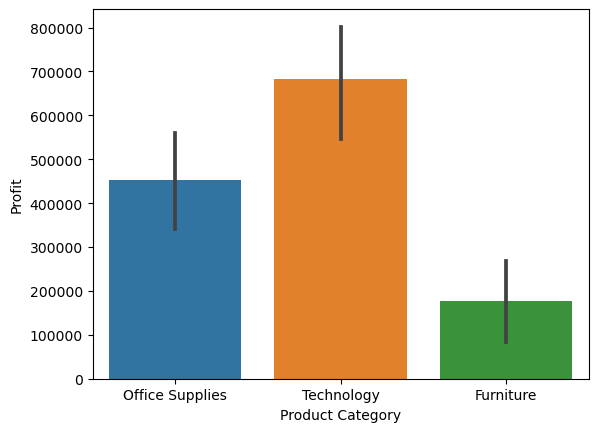

In [65]:
sns.barplot(x="Product Category", y = "Profit",data = dataset, estimator='sum')

In [69]:
dataset['State or Province'].value_counts().head()

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64